In [1]:
import networkx as nx
import pandas as pd
from networkx.algorithms.assortativity.mixing import mixing_dict
from networkx.utils import dict_to_numpy_array
from networkx.utils import accumulate
import scipy.stats as stats
import numpy as np  
import matplotlib.pyplot as plt 
import math
import random


In [2]:
m_Growth_Step = 30000


MAX_NUM_NODE = 12722
MAX_NUM_LINK = 303000
VERYBIG = 1000000

m_Initial_L = 20
m_Initial_N = 10

P1 = 0.87
P2 = 0.13

m_Para_P1 = 0.26
m_Para_P2 = 0.49
m_Para_P3 = 0.25
#m_Para_P4 = 0.1
#m_Para_P5 = 0.05
#m_Para_P6 = 0.03

m_Para_M = 3 

m_delta_P1 = -0.40
m_delta_P2 = -1.74
m_delta_P3 = 0.062

MAX_TRY = 10000

In [3]:
def Do_AddNewNode(thisNodeID):
    m_Node_num_nghb[thisNodeID] = 0

In [4]:
def Do_GetRandom(theBase):
     return random.uniform(0, theBase)

In [5]:
def Do_GetRandom_int(theBase):
    return random.randint(0,theBase)

In [6]:
def Do_IfHasNode(Start, End , NumNode):
    if Start == End or Start > NumNode or End > NumNode or Start < 0 or End < 0:
        return True
    else:
        return False

In [7]:
def Do_IfHasLink (thisStart, thisEnd):
    for iii in range(len(m_Link)):
        if m_Link[iii][1][0] == thisStart:
            if m_Link[iii][1][1] == thisEnd:
                return True 
        if m_Link[iii][1][0] == thisEnd:
            if m_Link[iii][1][1] == thisStart:
                return True
    return False 

In [8]:
def update_tempDoubleX_P1(Node_ID):
    K = m_Node_num_nghb[Node_ID]
    Exponent = 1 + m_delta_P1 * np.log10(K)
    tempDoubleX_P1[Node_ID] = K ** Exponent

In [9]:
def update_tempDoubleX_P2(Node_ID):
    K = m_Node_num_nghb[Node_ID]
    Exponent = 1 + m_delta_P2 * np.log10(K)
    tempDoubleX_P2[Node_ID] = K ** Exponent

In [10]:
def update_tempDoubleX_P3(Node_ID):
    K = m_Node_num_nghb[Node_ID]
    Exponent = 1 + m_delta_P3 * np.log10(K)
    tempDoubleX_P3[Node_ID] = K ** Exponent

In [11]:
def Do_GenerateInitialStatus():
    
    for iii in range(m_NumNode[0]):
        Do_AddNewNode(iii)
    
    for iii in range(m_Initial_N):
        temp = 0
        tempStart = iii
        
        
        while True: 
            tempEnd = Do_GetRandom_int(m_NumNode[0]-1)
            temp = temp + 1
            if Do_IfHasNode(tempStart, tempEnd, m_NumNode[0]) == False and Do_IfHasLink (tempStart, tempEnd) == False:
                break           
            if temp > MAX_TRY:
                return False
              
        m_Link.append([iii,[tempStart, tempEnd]])
        m_NumLink[0] = m_NumLink[0] + 1
        m_Node_num_nghb[tempStart] = m_Node_num_nghb[tempStart] + 1
        if tempEnd not in m_Node_num_nghb: 
            Do_AddNewNode(tempEnd)
        m_Node_num_nghb[tempEnd] = m_Node_num_nghb[tempEnd] + 1 
    
    for iii in range(m_Initial_N , m_Initial_L):
        temp = 0
        
        while True:
            tempStart = Do_GetRandom_int(m_NumNode[0]-1)
            tempEnd = Do_GetRandom_int(m_NumNode[0]-1)
            temp = temp + 1
           
            if Do_IfHasNode(tempStart, tempEnd, m_NumNode[0]) == False and Do_IfHasLink (tempStart, tempEnd) == False:
                break
            if temp > MAX_TRY:
                return False
            
        m_Link.append([iii,[tempStart, tempEnd]]) 
        m_NumLink[0] = m_NumLink[0] + 1
        if tempStart not in m_Node_num_nghb: 
            Do_AddNewNode(tempStart)
        m_Node_num_nghb[tempStart] = m_Node_num_nghb[tempStart] + 1
        if tempEnd not in m_Node_num_nghb: 
            Do_AddNewNode(tempEnd)
        m_Node_num_nghb[tempEnd] = m_Node_num_nghb[tempEnd] + 1 
        
    for iii in range(m_NumNode[0]):
        update_tempDoubleX_P1(iii)
        update_tempDoubleX_P2(iii)
        update_tempDoubleX_P3(iii)

In [12]:
def Do_Get_Node_P1(thisExecption):
    total = 0
    for iii in range(m_NumNode[0]):
        #K = m_Node_num_nghb[iii]
        #Exponent = 1.5 - m_delta * np.log10(K)
        #tempDoubleX[iii] = K ** Exponent
        total = total + tempDoubleX_P1[iii]
    
    while True :
        tempA = 0 
        tempDouble  = Do_GetRandom(total)
        for iii in range(m_NumNode[0]):
            tempB = tempA + tempDoubleX_P1[iii]
            if tempB >= tempDouble and tempDouble >= tempA:
                if iii == thisExecption:
                    break
                return iii
            tempA = tempB

In [13]:
def Do_Grow_Link_P1(thisStartNode):
    temp = 0
    
    while True:
        tempEndNode = Do_Get_Node_P1(thisStartNode)
        temp = temp + 1
        if Do_IfHasNode(thisStartNode, tempEndNode, m_NumNode[0]) == False and Do_IfHasLink (thisStartNode, tempEndNode) == False:
            break
        if temp > MAX_TRY:
            return -1;

    m_Link.append([m_NumLink[0],[thisStartNode, tempEndNode]])
    m_NumLink[0] = m_NumLink[0] + 1
    
    
    m_Node_num_nghb[thisStartNode] = m_Node_num_nghb[thisStartNode] + 1
    m_Node_num_nghb[tempEndNode] = m_Node_num_nghb[tempEndNode] + 1 
    
    update_tempDoubleX_P1(thisStartNode)
    update_tempDoubleX_P1(tempEndNode)
    
    update_tempDoubleX_P2(thisStartNode)
    update_tempDoubleX_P2(tempEndNode)
    
    update_tempDoubleX_P3(thisStartNode)
    update_tempDoubleX_P3(tempEndNode)
    return tempEndNode

In [14]:
def Do_Get_Node_P2():
    total = 0
    for i in range(m_NumNode[0]):
        total = total + tempDoubleX_P2[i]
    
    while True:
        tempA = 0
        tempDouble = Do_GetRandom(total)
        for ii in range(m_NumNode[0]):
            tempB = tempA + tempDoubleX_P2[ii]
            if tempB >= tempDouble and tempDouble >= tempA:
                return ii
            tempA = tempB 

In [15]:
def Do_Get_Node_P3():
    total = 0
    for i in range(m_NumNode[0]):
        total = total + tempDoubleX_P3[i]
    
    while True:
        tempA = 0
        tempDouble = Do_GetRandom(total)
        for ii in range(m_NumNode[0]):
            tempB = tempA + tempDoubleX_P3[ii]
            if tempB >= tempDouble and tempDouble >= tempA:
                return ii
            tempA = tempB

In [16]:
def Do_Grow_Link_P2():
    temp = 0 
    tempA = []
    
    while True:
        tempStartNode = Do_Get_Node_P2()
        tempEndNode = Do_Get_Node_P3()
        temp = temp + 1

        if Do_IfHasNode(tempStartNode, tempEndNode, m_NumNode[0]) == False and Do_IfHasLink (tempStartNode, tempEndNode) == False:
            break
                
        if temp > MAX_TRY:
            return -1
            
        
    m_Link.append([m_NumLink[0],[tempStartNode, tempEndNode]])
    m_NumLink[0] = m_NumLink[0] + 1
        
    m_Node_num_nghb[tempStartNode] = m_Node_num_nghb[tempStartNode] + 1
    m_Node_num_nghb[tempEndNode] = m_Node_num_nghb[tempEndNode] + 1
            
     
    
    update_tempDoubleX_P1(tempStartNode)
    update_tempDoubleX_P1(tempEndNode)
    update_tempDoubleX_P2(tempStartNode)
    update_tempDoubleX_P2(tempEndNode)
    update_tempDoubleX_P3(tempStartNode)
    update_tempDoubleX_P3(tempEndNode)

In [17]:
def Do_GenerateScientistNetwork():
    for iii in range(m_Growth_Step):
        Do_AddNewNode(m_NumNode[0]) 
        
        temp_A = Do_GetRandom(1)
        #temp = 0.9
        if temp_A < P1:
            temp_B = Do_GetRandom(1)
            if temp_B < m_Para_P1:
                Do_Grow_Link_P1(m_NumNode[0])
                m_NumNode[0] = m_NumNode[0] + 1
    
            elif temp_B < m_Para_P1 + m_Para_P2:
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                m_NumNode[0] = m_NumNode[0] + 1
            
        
            elif temp_B < m_Para_P1 + m_Para_P2 + m_Para_P3:
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                m_NumNode[0] = m_NumNode[0] + 1
        '''
            elif temp_B < m_Para_P1 + m_Para_P2 + m_Para_P3 + m_Para_P4 :
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                m_NumNode[0] = m_NumNode[0] + 1
        
            elif temp_B < m_Para_P1 + m_Para_P2 + m_Para_P3 + m_Para_P4 + m_Para_P5:
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                m_NumNode[0] = m_NumNode[0] + 1
                
            elif temp_B < m_Para_P1 + m_Para_P2 + m_Para_P3 + m_Para_P4 + m_Para_P5 + m_Para_P6:
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                Do_Grow_Link_P1(m_NumNode[0])
                m_NumNode[0] = m_NumNode[0] + 1
          '''     
        if temp_A < P1 + P2 :
            Do_Grow_Link_P2()
        
        
        else:
            for ttt in range(m_Para_M):
                Do_Grow_Link_Interactive(m_NumNode[0])
        if m_NumNode[0] >= MAX_NUM_NODE:
            break

In [18]:
def degree_rich_club_coefficient(G):
    deg = G.degree()
    rich_club = []
    rich_club_coefficient = 0.0
    for x in range(1,200):
        a  = dict((k, v) for k, v in deg.items() if v > x)
        N = len(a)
        if N == 1:
            break
        nodes = set(a)
        edges = 0
        for start_id, end_id in G.edges(nodes):
            if start_id in nodes:
                if end_id in nodes:
                    edges = edges + 1
        if N*(N-1) == 0:
            break
        if rich_club_coefficient != edges/((N*(N-1))/2):
            rich_club_coefficient = edges/((N*(N-1))/2) 
            if rich_club_coefficient != 0:
                rich_club.append((x,rich_club_coefficient))
    return rich_club

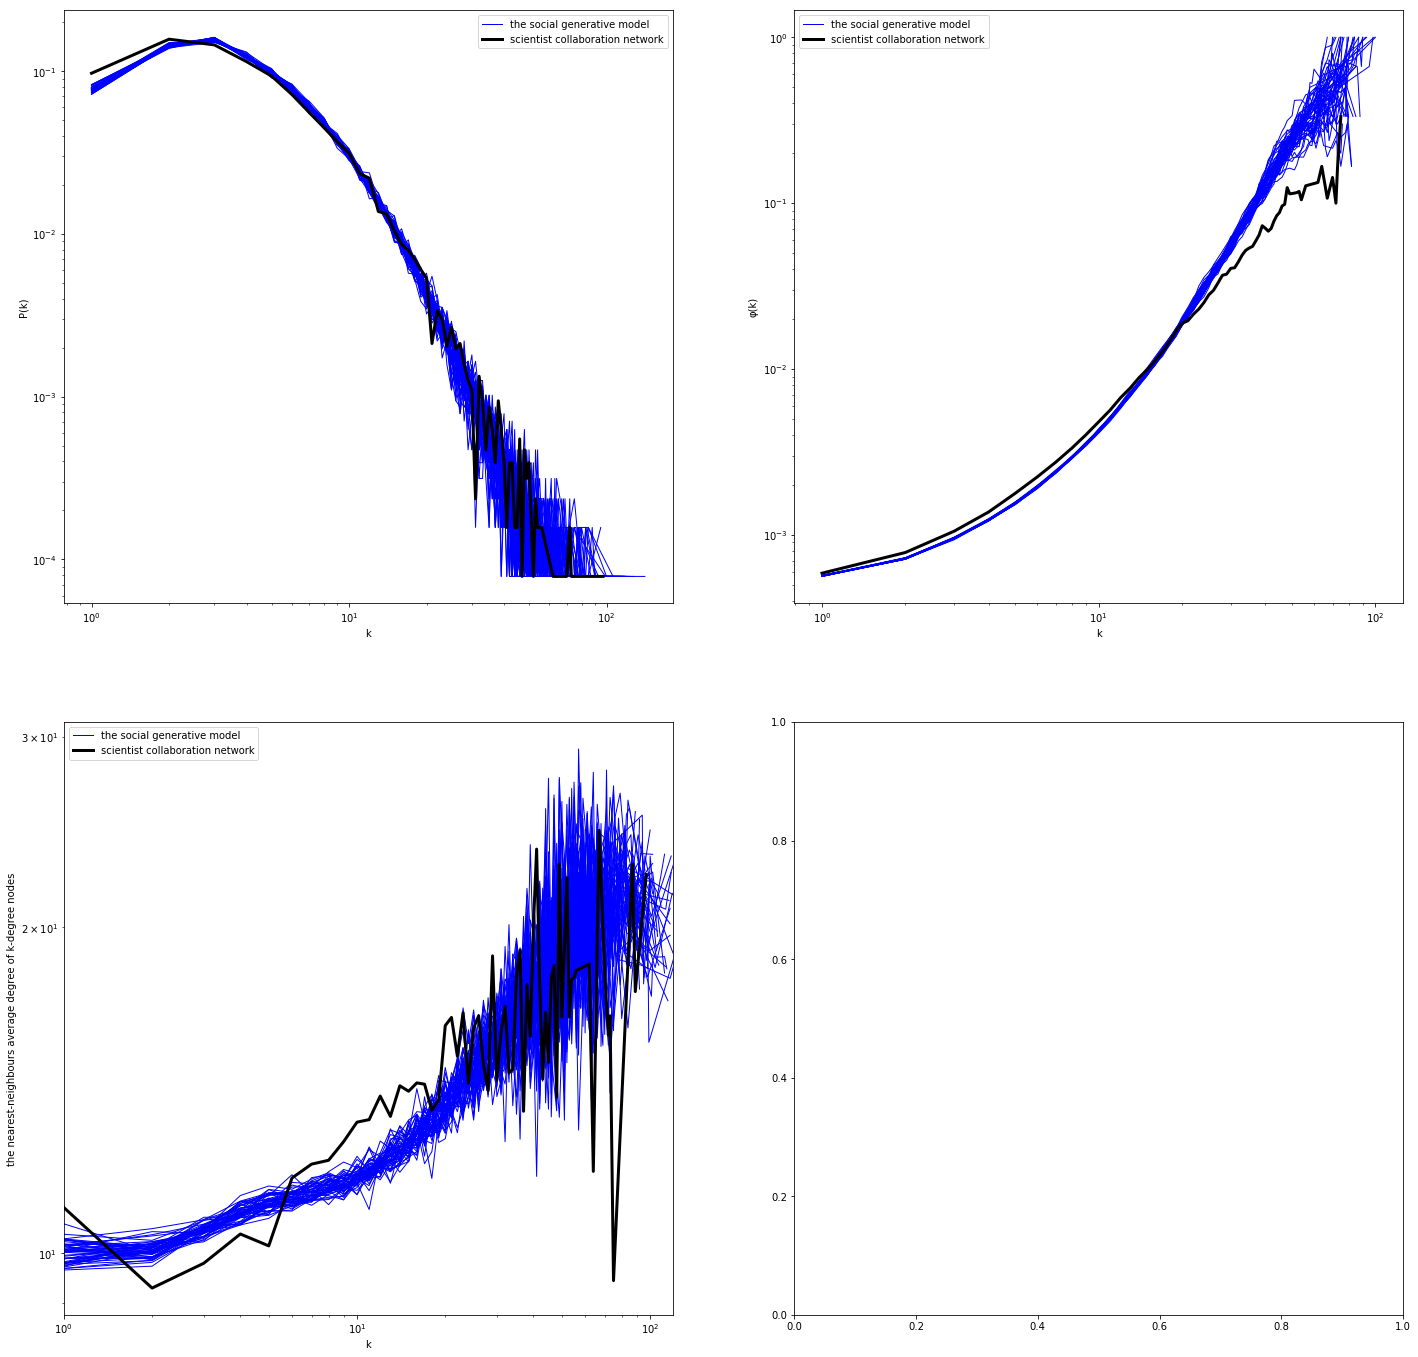

In [39]:
First_order_Excess_Degree = 0
Maximum_degree = 0
Edges = 0
Average_triangle = 0
average_clustering = 0
Xita = 0
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(24, 24))
for tempindex in range(50):
    m_NumNode = [m_Initial_N]
    m_NumLink = [0]
    m_Node_num_nghb = {}
    tempDoubleX_P1 = {}
    tempDoubleX_P2 = {}
    tempDoubleX_P3 = {}
    m_Link = []
    Do_GenerateInitialStatus()
    Do_GenerateScientistNetwork()

    a = []
    for i in range(len(m_Link)):
        a.append( [m_Link[i][1][0],m_Link[i][1][1]])
    G = nx.Graph(a)
    
    #First-order Excess Degree
    First_order_Excess_Degree = First_order_Excess_Degree + nx.degree_assortativity_coefficient(G)
    
    
    #Maximum degree
    Maximum_degree = Maximum_degree + max(G.degree().items(), key=lambda x: x[1])[1]
    
    Edges = Edges + len(G.edges())
    
    #Degree Distribution
    temp_x = []
    temp_y = []
    degree_G =  nx.degree_histogram(G)          
    xx_G = range(len(degree_G))                             
    yy_G = [z / float(sum(degree_G)) for z in degree_G] 
    for index in range(len(xx_G)):
        if yy_G[index] != 0:
            temp_x.append(xx_G[index])
            temp_y.append(yy_G[index])  
    plt.subplot(2,2,1)
    
    if tempindex == 1 :
        plt.loglog(temp_x,temp_y,color="blue",linewidth=1,label="the social generative model")
        plt.legend()
    else:
        plt.loglog(temp_x,temp_y,color="blue",linewidth=1)
    plt.xlabel('k')
    plt.ylabel('P(k)')
        
    
    Xi = np.array(np.log10(temp_x[6:40]))
    Yi = np.array(np.log10(temp_y[6:40]))
    
    Xita = Xita + np.polyfit(Xi, Yi, 1)[0]
    
    #rich-club conectivity
    degree_rich_club_G = degree_rich_club_coefficient(G)
    
    xxx_G = []
    yyy_G = []
    for iii in range(len(degree_rich_club_G)):
        xxx_G.append(degree_rich_club_G[iii][0])
    for iii in range(len(degree_rich_club_G)):
        yyy_G.append(degree_rich_club_G[iii][1])
    plt.subplot(2,2,2)
    
    if tempindex == 1:
        plt.loglog(xxx_G, yyy_G,color="blue",linewidth=1,label = "the social generative model")
        plt.legend()
    else:
        plt.loglog(xxx_G, yyy_G,'-',color="blue",linewidth=1)
    plt.ylabel('φ(k)')
    plt.xlabel('k')
    
    Xii = np.array(np.log10(xxx_G[6:40]))
    Yii = np.array(np.log10(yyy_G[6:40]))

    Xitaa = np.polyfit(Xii, Yii, 1)[0]
    
    #degree correlation
    degree_correlation = nx.k_nearest_neighbors(G)
    
    r = []
    rr = []
    for t in sorted(degree_correlation):
        r.append(t)
        rr.append(degree_correlation[t])
    plt.subplot(2,2,3)   
    if tempindex == 1:
        plt.loglog(r,rr,color = "blue",linewidth=1,label = "the social generative model")
        plt.legend()
    else:
        plt.loglog(r,rr,color = "blue",linewidth=1)
    
    plt.xlim(xmin=0)
    plt.xlabel('k')
    plt.ylabel('the nearest-neighbours average degree of k-degree nodes')
    
    
    avg_kt = sum(nx.triangles(G).values()) / len(nx.triangles(G))
    Average_triangle = Average_triangle + avg_kt
     
    average_clustering = average_clustering + nx.average_clustering(G)
    
train = pd.read_csv('51____01Scientist.csv')
aa = []
for i in range(len(train['node_A'])):
    aa.append( [train['node_A'][i],train['node_B'][i]])
GG = nx.Graph(aa)

#Degree Distribution
temp_x = []
temp_y = []
degree_G =  nx.degree_histogram(GG)          
xx_G = range(len(degree_G))                             
yy_G = [z / float(sum(degree_G)) for z in degree_G] 
for index in range(len(xx_G)):
    if yy_G[index] != 0:
        temp_x.append(xx_G[index])
        temp_y.append(yy_G[index])  
plt.subplot(2,2,1)
plt.loglog(temp_x,temp_y,color="black",linewidth=3,label = "scientist collaboration network")
plt.legend()

#rich-club conectivity
degree_rich_club_G = degree_rich_club_coefficient(GG)
    
xxx_G = []
yyy_G = []
for iii in range(len(degree_rich_club_G)):
    xxx_G.append(degree_rich_club_G[iii][0])
for iii in range(len(degree_rich_club_G)):
    yyy_G.append(degree_rich_club_G[iii][1])
plt.subplot(2,2,2)
plt.loglog(xxx_G, yyy_G,color="black",linewidth=3,label = "scientist collaboration network")
plt.legend()

#degree correlation
degree_correlation = nx.k_nearest_neighbors(GG)
    
r = []
rr = []
for t in sorted(degree_correlation):
    r.append(t)
    rr.append(degree_correlation[t])
plt.subplot(2,2,3)       
plt.loglog(r,rr,color="black",linewidth=3,label = "scientist collaboration network")
plt.xlim(xmin=0)
plt.legend()

plt.show()

In [30]:
First_order_Excess_Degree / 50

0.016044125417707503

In [31]:
Maximum_degree /50

11.48

In [32]:
Edges /50

3989.6

In [33]:
Average_triangle /50

0.013658229838075776

In [34]:
average_clustering / 50

0.0001406025844329479

In [35]:
sum(nx.triangles(GG).values()) / len(nx.triangles(GG))

13.73038830372583

In [36]:
sum(nx.triangles(G).values()) / len(nx.triangles(G)) 

0.13512026410941677

In [37]:
nx.average_clustering(GG)

0.6517200169513229

In [38]:
nx.degree_histogram(G)[3]/len(G.degree()) * 100

15.846565005502281

In [60]:
degree_rich_club_G = degree_rich_club_coefficient(G)
    
xxx_G = []
yyy_G = []
for iii in range(len(degree_rich_club_G)):
    xxx_G.append(degree_rich_club_G[iii][0])
for iii in range(len(degree_rich_club_G)):
    yyy_G.append(degree_rich_club_G[iii][1])

Xii = np.array(np.log10(xxx_G[6:40]))
Yii = np.array(np.log10(yyy_G[6:40]))

Xitaa = np.polyfit(Xii, Yii, 1)[0]

In [61]:
Xitaa

2.4612301562415246

In [74]:
temp_x = []
temp_y = []
degree_G =  nx.degree_histogram(GG)          
xx_G = range(len(degree_G))                             
yy_G = [z / float(sum(degree_G)) for z in degree_G] 
for index in range(len(xx_G)):
    if yy_G[index] != 0:
        temp_x.append(xx_G[index])
        temp_y.append(yy_G[index])  
    
    
Xi = np.array(np.log10(temp_x[6:40]))
Yi = np.array(np.log10(temp_y[6:40]))
    
Xita = np.polyfit(Xi, Yi, 1)[0]

In [75]:
Xita

-3.2253112189979931